# Homework 7

## Your Name Here (or your names here if you are pair programming)

Student Name: Tyler Smedley

Student UT EID: tws933

---

Partner Name:

Partner UT EID:

---

Date Created: 03/18/24

Date Last Modified: 03/20/24

---

Totoal Points 20. 



## Supprt Vector Machine 

In [123]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Your allowed to use only the above libraries that are imported. No other libs should be used in this assignment. 

## Heart Dataset 

In this Assignment we will work with some patients dataset. 

We have access to 303 patients data. The features are listed below. 

In [124]:
# Your code here
heart_df = pd.read_csv("Heart.csv")
heart_df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


**Age:** The person’s age in years

**Sex:** The person’s sex (1 = male, 0 = female)

**ChestPain:** chest pain type

* Value 0: asymptomatic
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: typical angina

**RestBP:** The person’s resting blood pressure (mm Hg on admission to the hospital)

**Chol:** The person’s cholesterol measurement in mg/dl

**Fbs:** The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: resting electrocardiographic results

* Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
* Value 1: normal
* Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**RestECG:** The person’s maximum heart rate achieved

**MaxHR:** Exercise induced angina (1 = yes; 0 = no)

**Oldpeak:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

**Slope:** the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

* 0: downsloping; 
* 1: flat; 
* 2: upsloping

**Ca:** The number of major vessels (0–3)

**Thal:** A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously

* Value 1: fixed defect (no blood flow in some part of the heart)
* Value 2: normal blood flow
* Value 3: reversible defect (a blood flow is observed but it is not normal)

**Target:** Heart disease (1 = no, 0= yes)

# Task - 1 Implement SVM using libraries (4 points)
We want to use **Suppert Vector Machine** to perdict if the patients will have heart problems or not. The column "Target" in our datasets includes data about heart diseases. If the patient had heart disease we have a 1 and if not a zero. 

Prepare your data set for predicting heart disease ("Target" column) out of 3 features:

* Age of the patient (Column **"Age"**)
* Gender of the patient (male or female - Column **"Sex"**)
* Cholestrol level of the patient (Column **"Chol"**) 


Split your data into 80% traning data and 20% test data, and implement Support Vector Machine using Scikit-Learn. 





In [125]:
# Convert target yes/no to 1/0 and create test/train
from sklearn.model_selection import train_test_split

heart_df['Target'] = heart_df['Target'].map({'Yes':1, 'No':0})
y = heart_df['Target']
X = heart_df[['Age', 'Sex', 'Chol']]

y_train, y_test, X_train, X_test = train_test_split(y, X, test_size=0.2, random_state=0)

In [126]:
# import sklearn's svm model, fit training data, and predict target values from test data
from sklearn import svm

svm_model  = svm.SVC()
svm_model.fit(X_train, y_train)

target_pred = svm_model.predict(X_test)

# Task 2 - (4 points)

Cacluate the accuracy, Precision, Recall and F1 score of your **SVM** implementaion from Task 1. 
Print the results. 

You may use library methods for this task if you choose to.


In [127]:
# use sklearn to calculate and print accuracy, precision, recall, and F1 score
from sklearn.metrics import classification_report

print(classification_report(y_test, target_pred))
# 0 = no heart problems
# 1 = heart problems

              precision    recall  f1-score   support

           0       0.56      0.69      0.62        35
           1       0.39      0.27      0.32        26

    accuracy                           0.51        61
   macro avg       0.47      0.48      0.47        61
weighted avg       0.49      0.51      0.49        61



# Task 3 - Implement SVM without using libraries  - (4 points)

Implement SVM from scratch using Hinge Loss function and Gradient Descent. 
Try to produce the same result as you get from the libraries. 


* Do as many iterations as needed 
* Do maximum **100 iterations**
* Use a very small learning rate for checking your GD implementation. 
* Your are allowed to use your choice of learning rate, like using 0.0001, 0.001 or 0.01 or 0.1 or higher. 
* Visualize your costs. 
* No need to add an y-intercept in this task. 
* You can use libraries to report accuracy, Precision, Recall and F1. 



In [128]:
# function to compute cost
def compute_cost(X, y, W, reg_factor):
    n = X.shape[0]
    distances = 1 - y *(np.dot(X, W))
    distances[distances < 0] = 0

    hinge_loss = reg_factor * (np.sum(distances) / n)
    return (np.dot(W, W) + hinge_loss)


In [129]:
# function to calculate gradient
def calculate_gradient(X, y, W, reg_factor):
    X = np.array(X)
    y = np.array(y)

    distance = 1 - (y * np.dot(X, W))
    dw = np.zeros(len(W))

    for ind, d  in enumerate(distance):
        if d < 0:
            di = W
        else:
            di = W - (reg_factor * y[ind] * X[ind])
        dw += di

    dw = dw/len(y)
    return dw



In [130]:
weights  = np.zeros(X.shape[1])

# optimize SVM using gradient descent
num_iterations = 100
learning_rate = 0.001
regularization = 0.01
cost_list = []

for i in range(0, num_iterations):
    cost = compute_cost(X_train, y_train, weights, regularization)
    print("Epoch", i, "Cost is:", cost, "weights", weights)
    cost_list.append(cost)
    gradient = calculate_gradient(X_train, y_train, weights, regularization)
    
    weights = weights - learning_rate * gradient


Epoch 0 Cost is: 0.01 weights [0. 0. 0.]
Epoch 1 Cost is: 0.00854866116878287 weights [2.64421488e-04 3.67768595e-06 1.17595041e-03]
Epoch 2 Cost is: 0.007101674902720561 weights [5.28578554e-04 7.35169421e-06 2.35072488e-03]
Epoch 3 Cost is: 0.005876810055873424 weights [7.92471463e-04 1.10220285e-05 3.52432456e-03]
Epoch 4 Cost is: 0.005544600563368137 weights [9.60356677e-04 1.34903453e-05 4.18749445e-03]
Epoch 5 Cost is: 0.005473077462807743 weights [1.04042938e-03 1.47991690e-05 4.47326564e-03]
Epoch 6 Cost is: 0.0054419610963325265 weights [1.09257077e-03 1.56521384e-05 4.65098245e-03]
Epoch 7 Cost is: 0.005423896939203595 weights [1.13304844e-03 1.63389656e-05 4.78633147e-03]
Epoch 8 Cost is: 0.005412203719235657 weights [1.16600631e-03 1.69424614e-05 4.89716498e-03]
Epoch 9 Cost is: 0.005403405112646069 weights [1.19566675e-03 1.74627090e-05 4.99156533e-03]
Epoch 10 Cost is: 0.005397602469731894 weights [1.22046281e-03 1.78997917e-05 5.07037542e-03]
Epoch 11 Cost is: 0.00539352

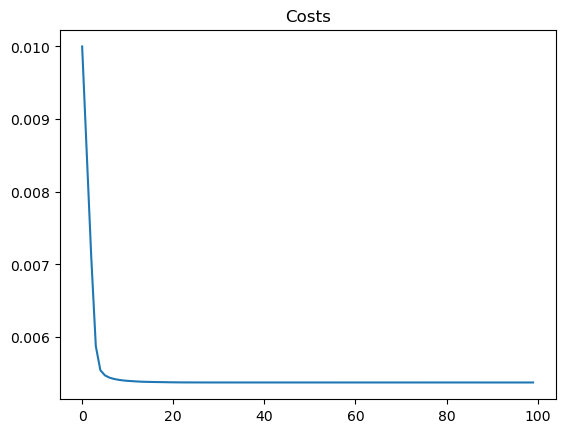

In [131]:
plt.plot(np.arange(num_iterations), cost_list)
plt.title("Costs")
plt.show()


In [132]:
from sklearn.metrics import accuracy_score
# prediction calculation
target_pred_2 = np.where(np.dot(X_test, weights)<0, -1, 1)
print("Accuracy Score:", accuracy_score(y_test, target_pred_2))

Accuracy Score: 0.4262295081967213


# Task 4 - Compare SVM results with Logistic Regression - (4 points)

Which model performs better here? Compare your results wit the logistic regression. You can use libraries for this task, it is not necessary to implement logistic regression from sratch.


In [133]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)
lr_predict = lr_model.predict(X_test)

cr = classification_report(y_test, lr_predict)
print(cr)
# The logistic regression model scored better in every metric than the svm model
# the accuarcy of svm was about 50% while the logistic regression was about 75%

              precision    recall  f1-score   support

           0       0.81      0.74      0.78        35
           1       0.69      0.77      0.73        26

    accuracy                           0.75        61
   macro avg       0.75      0.76      0.75        61
weighted avg       0.76      0.75      0.76        61



# Task 5 - Apply a kernel function to improve SVM performance (4 points)

Use the Scikit-learn librariy and apply a kernel function to improve the SVM performance. Check if this is possible. 


In [134]:
# Add your code Here! 
kernel_model = svm.SVC(kernel = 'linear')
kernel_model.fit(X_train, y_train)
ker_pred = kernel_model.predict(X_test)
print(classification_report(ker_pred, y_test))

# adding a linear kernel to the prediction imporoved the accuracy to 74% from about 50%


              precision    recall  f1-score   support

           0       0.69      0.83      0.75        29
           1       0.81      0.66      0.72        32

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.75      0.74      0.74        61

